In [1]:
!pip install graphviz

In [2]:
from graphviz import Digraph
from IPython.display import display
from itertools import product

In [3]:
class BayesianNetwork:
    def __init__(self):
        self.graph = {}
        self.cpt = {}
        self.variables = []
        self.parents = {}

    def add_node(self, var, parents, cpt_table):
        self.variables.append(var)
        self.graph[var] = parents
        self.parents[var] = parents
        self.cpt[var] = cpt_table

    def visualize_ipython(self):
        dot = Digraph(comment="Bayesian Network DAG")
        for node in self.variables:
            dot.node(node)
            for parent in self.parents[node]:
                dot.edge(parent, node)
        display(dot)

    def get_prob(self, var, value, evidence):
        key = tuple(evidence[p] for p in self.parents[var])
        prob = self.cpt[var][key]
        return prob if value else 1 - prob

    def enumerate_all(self, vars, evidence):
        if not vars:
            return 1.0
        Y = vars[0]
        rest = vars[1:]
        if Y in evidence:
            prob = self.get_prob(Y, evidence[Y], evidence)
            return prob * self.enumerate_all(rest, evidence)
        else:
            total = 0
            for yval in [True, False]:
                evidence_copy = evidence.copy()
                evidence_copy[Y] = yval
                prob = self.get_prob(Y, yval, evidence)
                total += prob * self.enumerate_all(rest, evidence_copy)
            return total

    def query(self, var, evidence={}):
        prob_true = self.enumerate_all(self.variables, {**evidence, var: True})
        prob_false = self.enumerate_all(self.variables, {**evidence, var: False})
        norm = prob_true + prob_false
        return {True: prob_true / norm, False: prob_false / norm}

In [4]:
bn = BayesianNetwork()

In [5]:
bn.add_node('Burglary', [], {
    (): 0.001
})

bn.add_node('Earthquake', [], {
    (): 0.002
})

bn.add_node('Alarm', ['Burglary', 'Earthquake'], {
    (True, True): 0.95,
    (True, False): 0.94,
    (False, True): 0.29,
    (False, False): 0.001
})

bn.add_node('JohnCalls', ['Alarm'], {
    (True,): 0.90,
    (False,): 0.05
})

bn.add_node('MaryCalls', ['Alarm'], {
    (True,): 0.70,
    (False,): 0.01
})

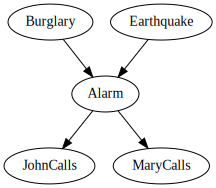

In [6]:
bn.visualize_ipython()

In [7]:
print("P(Burglary=True):", bn.query('Burglary'))
print("P(Burglary=True | JohnCalls=True, MaryCalls=True):", bn.query('Burglary', {'JohnCalls': True, 'MaryCalls': True}))

P(Burglary=True): {True: 0.001, False: 0.999}
P(Burglary=True | JohnCalls=True, MaryCalls=True): {True: 0.2841718353643929, False: 0.7158281646356071}
